In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [1] Importing libraries

In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import PIL
from matplotlib import cm
import csv

# [2] Read and Show data

In [ ]:
data_path = '/content/drive/MyDrive/EyeDisease_Bahaloo/ODIR-5K-kaggle-dataset'

images_train = [f for f in glob.glob(data_path + '/Training Images/*')]
images_test = [f for f in glob.glob(data_path + '/Testing Images/*')]

In [ ]:
len(images_train), len(images_test)

(7000, 1000)

Report[2]-1: As we see we have 8000 images which are seperated into train and test images:<br>
Train : 7000 images <br>
Test : 1000 images

(1944, 2592, 3)


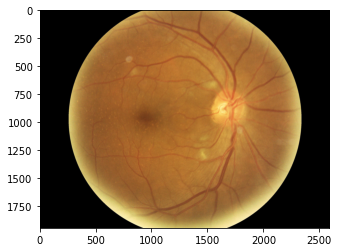

In [ ]:
first = plt.imread(data_path + '/Training Images/4784_right.jpg')
print(first.shape)
plt.imshow(first)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

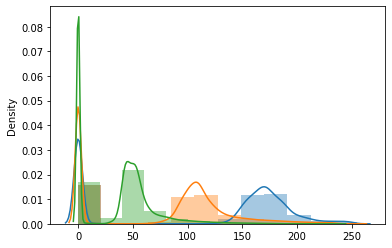

In [ ]:
sns.distplot(first[:, :, 0], bins=12)
sns.distplot(first[:, :, 1], bins=12)
sns.distplot(first[:, :, 2], bins=12)

Report[2]-2: Quick look at color value histograms for pixel matrix from first image </br>
Also showing the image and it's shape

# [3] Explore Data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/EyeDisease_Bahaloo/ODIR-5K-kaggle-dataset/data.xlsx')

df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [ ]:
df.shape

(3500, 15)

In [ ]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2218.233143,57.854000,0.325714,0.322286,0.061429,0.060571,0.046857,0.029429,0.049714,0.279714
std,1415.437872,11.724064,0.468708,0.467419,0.240149,0.238577,0.211363,0.169029,0.217385,0.448923
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2372.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3247.250000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Report[3]-1: As we have 3500 patients and 7000 training images, we can conclude that we have 2 images of left and right eye of each patient

###[3]-1 Patients Age description

In [ ]:
df['Patient Age'].describe

<bound method NDFrame.describe of 0       69
1       57
2       42
3       66
4       53
        ..
3495    63
3496    42
3497    54
3498    57
3499    58
Name: Patient Age, Length: 3500, dtype: int64>

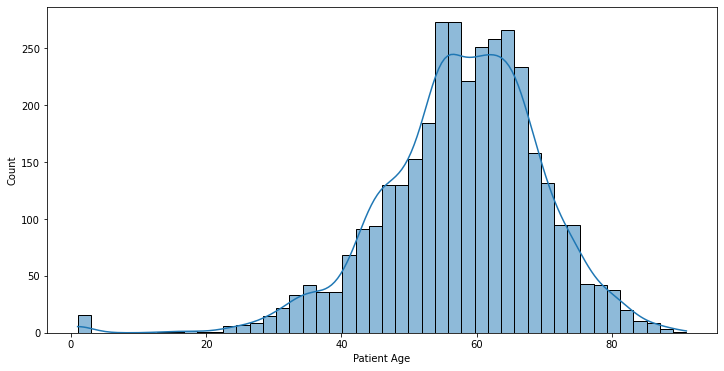

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df, x=df['Patient Age'], kde=True, ax=ax)

Report[3]-1-1: Most of patients are around 57 years old

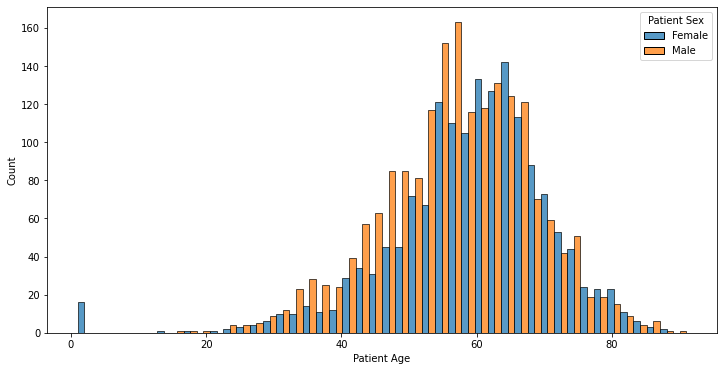

In [ ]:
sns.histplot(df, x=df['Patient Age'], multiple="dodge", hue=df['Patient Sex'], ax=ax)

Report[3]-1-2:Age distribution and patients sex

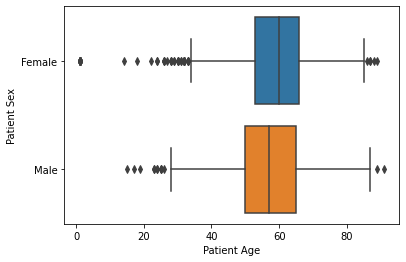

In [ ]:
fig = sns.boxplot(x=df['Patient Age'], y=df['Patient Sex'], data=df)

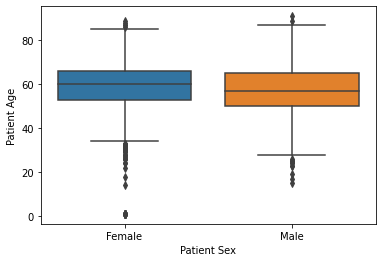

In [ ]:
fig = sns.boxplot(y=df['Patient Age'], x=df['Patient Sex'], data=df)

###[3]-2 Patients Sex description

Male      1885
Female    1615
Name: Patient Sex, dtype: int64

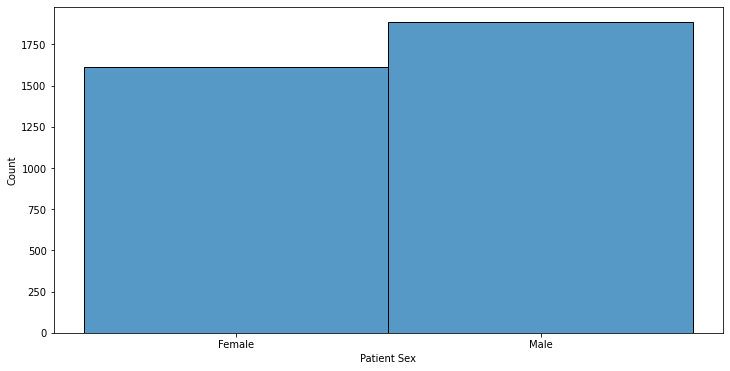

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df, x=df['Patient Sex'], ax=ax)
df['Patient Sex'].value_counts()

Report[3]-2-1: There are 1885 males and 1615 females in our dataset

## [3]-3 Left and Right Eye exploaration

normal fundus                                                              1383
moderate non proliferative retinopathy                                      379
mild nonproliferative retinopathy                                           240
cataract                                                                    127
pathological myopia                                                         116
                                                                           ... 
hypertensive retinopathy，moderate non proliferative retinopathy               1
suspected glaucoma，moderate non proliferative retinopathy                     1
central serous chorioretinopathy                                              1
post laser photocoagulation                                                   1
moderate non proliferative retinopathy，age-related macular degeneration       1
Name: Right-Diagnostic Keywords, Length: 233, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


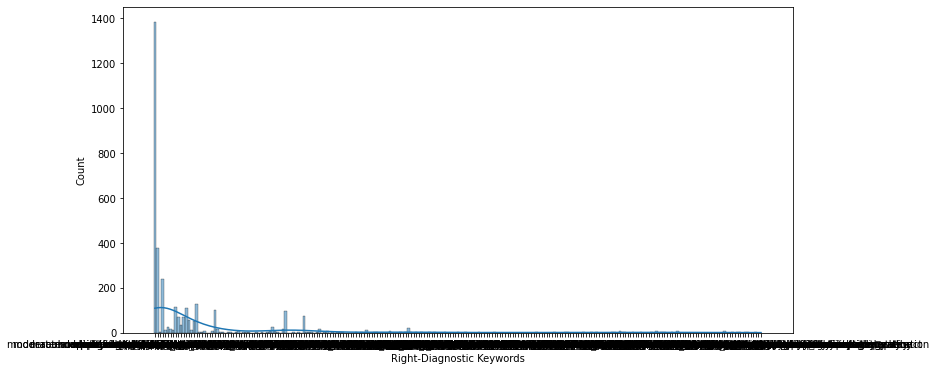

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['Right-Diagnostic Keywords'], kde=True, ax=ax)
df['Right-Diagnostic Keywords'].value_counts()

normal fundus                                                              1383
moderate non proliferative retinopathy                                      379
mild nonproliferative retinopathy                                           240
cataract                                                                    127
pathological myopia                                                         116
                                                                           ... 
hypertensive retinopathy，moderate non proliferative retinopathy               1
suspected glaucoma，moderate non proliferative retinopathy                     1
central serous chorioretinopathy                                              1
post laser photocoagulation                                                   1
moderate non proliferative retinopathy，age-related macular degeneration       1
Name: Right-Diagnostic Keywords, Length: 233, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


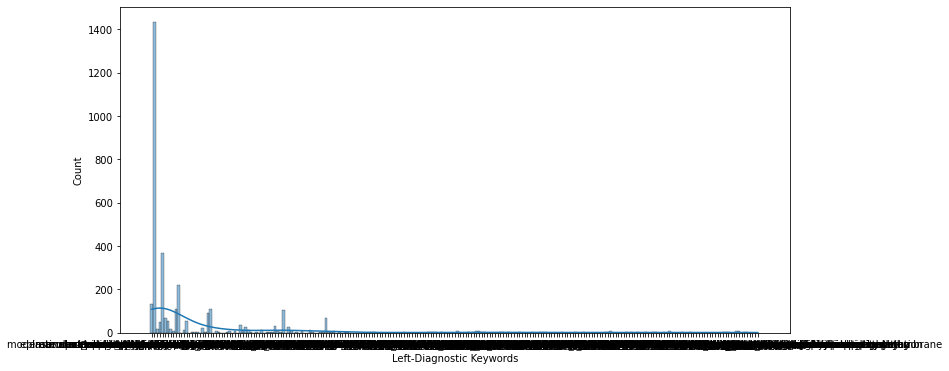

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['Left-Diagnostic Keywords'], kde=True, ax=ax)
df['Right-Diagnostic Keywords'].value_counts()

Report[3]-3-1: There are lots of keywords for each eye,we can see some of them below:</br>
1. normal fundus                                                             
2. moderate non proliferative retinopathy                                      
3. mild nonproliferative retinopathy                                           
4. cataract                                                              
5. pathological myopia </br>

Normal and moderate non proliferative retinopathy are mostly labeled on both eyes.

Report[3]-3-2: In this part we can see each eye related keyworks which normal fundas is in the first rank

##[3]-4 Exploring Labels

Report[3]-4-1: Generally we have 8 labels:</br>
N: Normal</br>
D: Diabetes</br>
G: Glaucoma</br>
C: Cataract</br>
A: AMD</br>
H: Hypertension</br>
M: Myopia</br>
O: Others</br>

In [ ]:
df_labels = df.iloc[:,7:]
df_labels.head()

,N,D,G,C,A,H,M,O
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


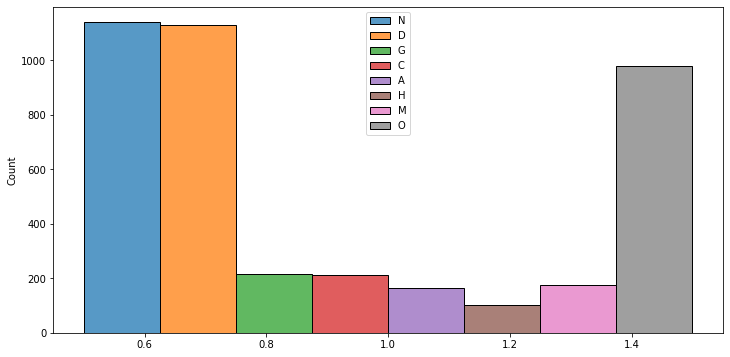

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_labels[df_labels==1],  multiple="dodge")
# sns.histplot(data=df_labels, x=[df_labels.N[df_labels['N']==1], df_labels.N[df_labels['D']==1]])

Report[3]-4-2: Ignore default values in the x axis.
Here we have count of each label. For instance there are almost 1000 eye which are Normal. Diabetes are in the second rank.

In [ ]:
df_melted = df.melt(id_vars =['ID'], value_vars =['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'])

In [ ]:
df_melted.head()

,ID,variable,value
0,0,N,0
1,1,N,1
2,2,N,0
3,3,N,0
4,4,N,0


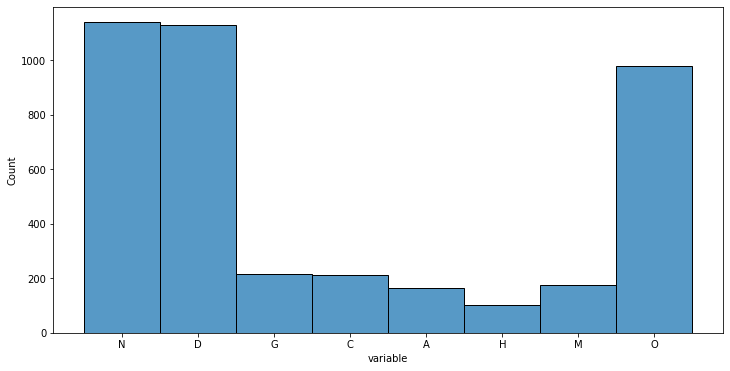

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_melted['variable'][df_melted['value']==1], ax=ax)

Report[3]-4-3: This is another way to show number of each diasease occurance. Actually it is a more logical and better method. I melted the original dataframe

In [ ]:
df_melted.head() , df_melted.shape

(   ID variable  value
 0   0        N      0
 1   1        N      1
 2   2        N      0
 3   3        N      0
 4   4        N      0, (28000, 3))

In [ ]:
df2 = df[['Patient Sex']]
df2.head(), df2.shape

(  Patient Sex
 0      Female
 1        Male
 2        Male
 3        Male
 4        Male, (3500, 1))

In [ ]:
frames = [df2, df2, df2, df2, df2, df2, df2, df2]
df_final1 = pd.concat(frames)
df_final1.head(), df_final1.shape

(  Patient Sex
 0      Female
 1        Male
 2        Male
 3        Male
 4        Male, (28000, 1))

In [ ]:
df_final1.shape, df_melted.shape

((28000, 1), (28000, 3))

In [ ]:
index = pd.Index([i for i in range(28000)])
df_melted = df_melted.set_index(index)
df_final1 = df_final1.set_index(index)

In [ ]:
df_result = pd.concat([df_final1, df_melted], axis=1, join="inner")
df_result.head() , df_result.shape

(  Patient Sex  ID variable  value
 0      Female   0        N      0
 1        Male   1        N      1
 2        Male   2        N      0
 3        Male   3        N      0
 4        Male   4        N      0, (28000, 4))

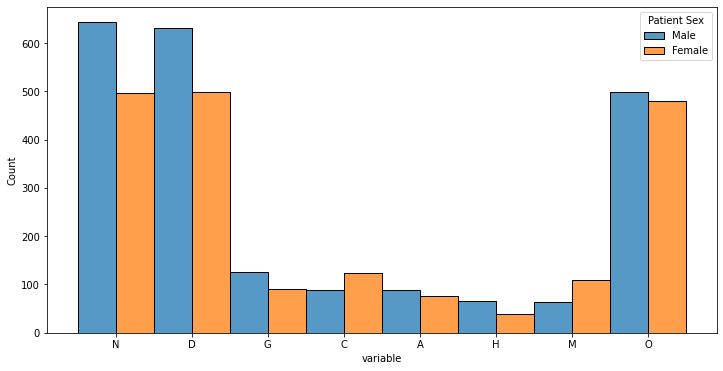

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_result, x=df_result['variable'][df_melted['value']==1], hue=df_result['Patient Sex'][df_melted['value']==1], ax=ax, multiple="dodge")

Report[3]-4-4: This visualisation shows number of patients having each disease and according to their gender

In [ ]:
df3 = df[['Patient Age']]
df3.head(), df3.shape

(   Patient Age
 0           69
 1           57
 2           42
 3           66
 4           53, (3500, 1))

In [ ]:
frames2 = [df3, df3, df3, df3, df3, df3, df3, df3]
df_final2 = pd.concat(frames2)
df_final2.head(), df_final2.shape

(   Patient Age
 0           69
 1           57
 2           42
 3           66
 4           53, (28000, 1))

In [ ]:
index = pd.Index([i for i in range(28000)])
df_melted = df_melted.set_index(index)
df_final2 = df_final2.set_index(index)

In [ ]:
df_result2 = pd.concat([df_final2, df_melted], axis=1, join="inner")
df_result2.head() , df_result2.shape

(   Patient Age  ID variable  value
 0           69   0        N      0
 1           57   1        N      1
 2           42   2        N      0
 3           66   3        N      0
 4           53   4        N      0, (28000, 4))

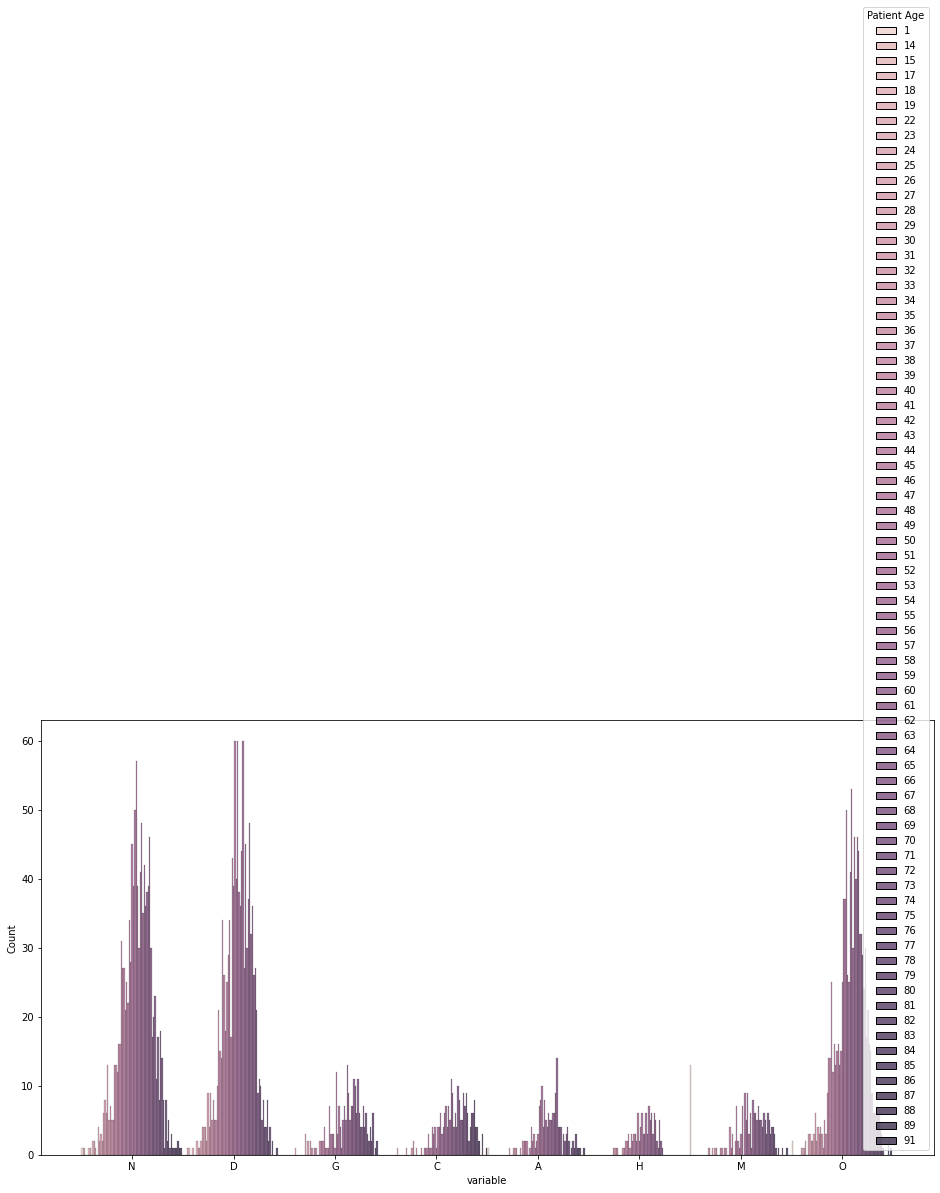

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(df_result2, x=df_result2['variable'][df_melted['value']==1], hue=df_result2['Patient Age'][df_melted['value']==1], ax=ax, multiple="dodge")

Report[3]-4-5: This visualisation shows number of patients having each disease and according to their age

##[3]-5 Displaying

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


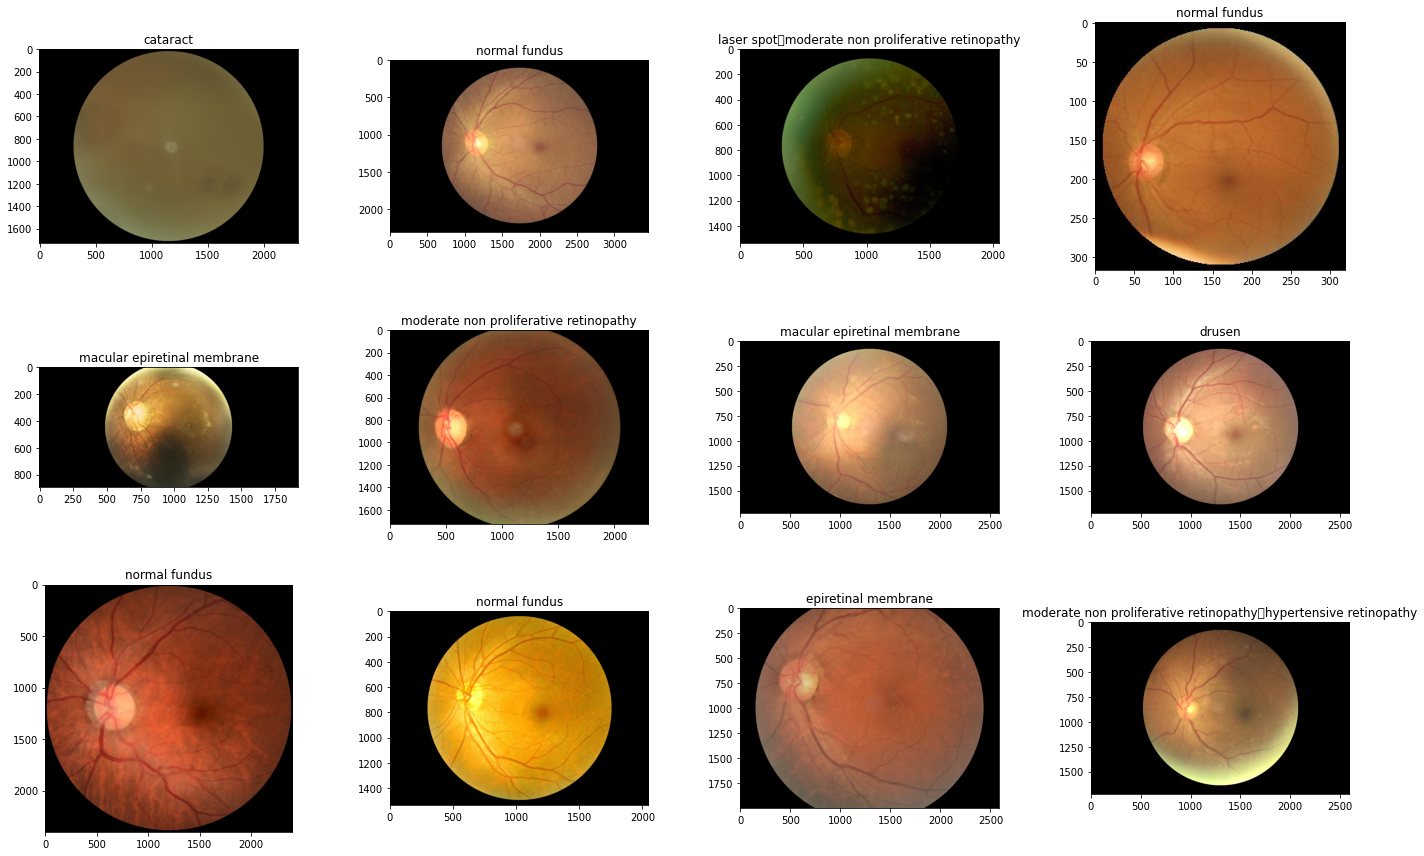

In [ ]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'ID']
        image_id = df.loc[i,'Left-Diagnostic Keywords']
        img = cv2.imread(f'{data_path}/Training Images/{image_path}_left.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(df)

Report[3]-5-1: Here we can see some fundas images with their related label.

##[3]-6 Corrolation

Text(0.5, 1.0, 'Covariance matrix')

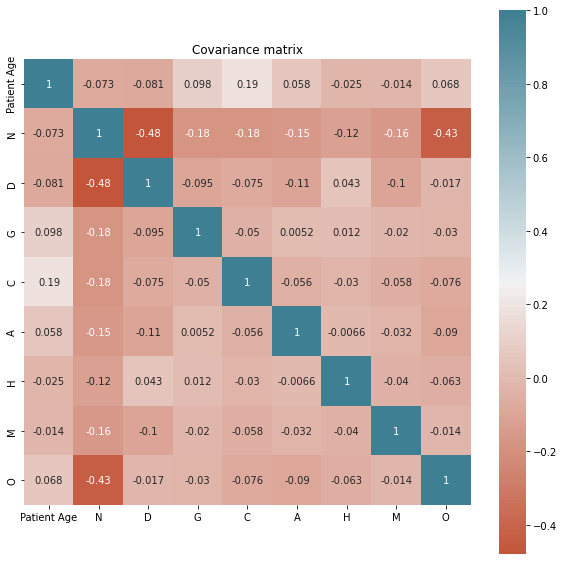

In [ ]:
df_new = df[['Patient Age', 'Patient Sex', 'N', 'D', 'G', 'C',	'A'	,'H' ,'M', 'O']]
# corr=df1.corr(method='pearson')
plt.figure(figsize=(10,10))

sns.heatmap(df_new.corr(), annot=True, square=True, cbar=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Covariance matrix')

## [3]-7 Preprocess

In [ ]:
def resize_image_(img, image_width, r_or_l, keep_aspect_ration=False):
    """
    This function will resize an input image

    Parameters
    ----------
    image_width : int
        Width of the input image
    img : str
        Path to the input image
    keep_aspect_ration : bool
        True: Resize image with respect to the original image hight and width ratio
        False: Just resize to a square
    r_or_l : str
        right: image is from right eye
        left: image is from left eye
    Returns
    -------
    [np array]
        [returns the image]
    """

    # img = Image.fromarray(np.uint8(cm.gist_earth(img)*255))
    img = Image.fromarray((img * 255).astype(np.uint8))
    img.show()
    if keep_aspect_ration:
        # it will have the exact same width-to-height ratio as the original photo
        width_percentage = image_width / float(img.size[0])
        height_size = int((float(img.size[1]) * float(width_percentage)))
        img = img.resize((image_width, height_size), PIL.Image.ANTIALIAS)
    else:
        # This will force the image to be square
        img = img.resize((image_width, image_width), PIL.Image.ANTIALIAS)
    if r_or_l == "right":
        # self.logger.debug("Right eye image found. Flipping it")
        return np.array(img.transpose(Image.FLIP_LEFT_RIGHT))
    elif r_or_l == "left":
        return np.array(img)


def ben_graham_(img, scale):

    """
    The method of the winner of Kaggle competition

    Parameters
    ----------
    img : np.ndarray
        numpy array of the input image

    scale : int
    Scale 300 seems to be sufficient; 500 and 1000 may be overkill

    Returns
    -------
    np.ndarray
        Outputs the image
    """
    x = img[int(img.shape[0] / 2), :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    img = cv2.resize(img, (0, 0), fx=s, fy=s)

    b = np.zeros(img.shape)
    cv2.circle(
        b,
        (int(img.shape[1] / 2), int(img.shape[0] / 2)),
        int(scale * 0.9),
        (1, 1, 1),
        -1,
        8,
        0,
    )
    aa = cv2.addWeighted(
        img, 4, cv2.GaussianBlur(img, (0, 0), scale / 30), -4, 128
    ) * b + 128 * (1 - b)
      
    # return cv2.imwrite("a.jpg", aa)
    return aa

  
def crop_image_(img):
    """
    This function will crop the black parts of the input image

    Parameters
    ----------
    img : np.ndarray
        numpy array of the input image

    Returns
    -------
    np.ndarray
        Outputs the image
    """
    # Mask of coloured pixels.
    mask = img > 0

    # Coordinates of coloured pixels.
    coordinates = np.argwhere(mask)

    # Binding box of non-black pixels.
    x0, y0, s0 = coordinates.min(axis=0)
    x1, y1, s1 = coordinates.max(axis=0) + 1  # slices are exclusive at the top

    # Get the contents of the bounding box.
    cropped = img[x0:x1, y0:y1]
    # overwrite the same file
    return cropped

### 1. Apply crop function

In [ ]:
path = data_path + '/Training Images/4784_right.jpg'
image = cv2.imread(path)
cv2.imwrite("1.jpg", image)

True

Original Image: </br>
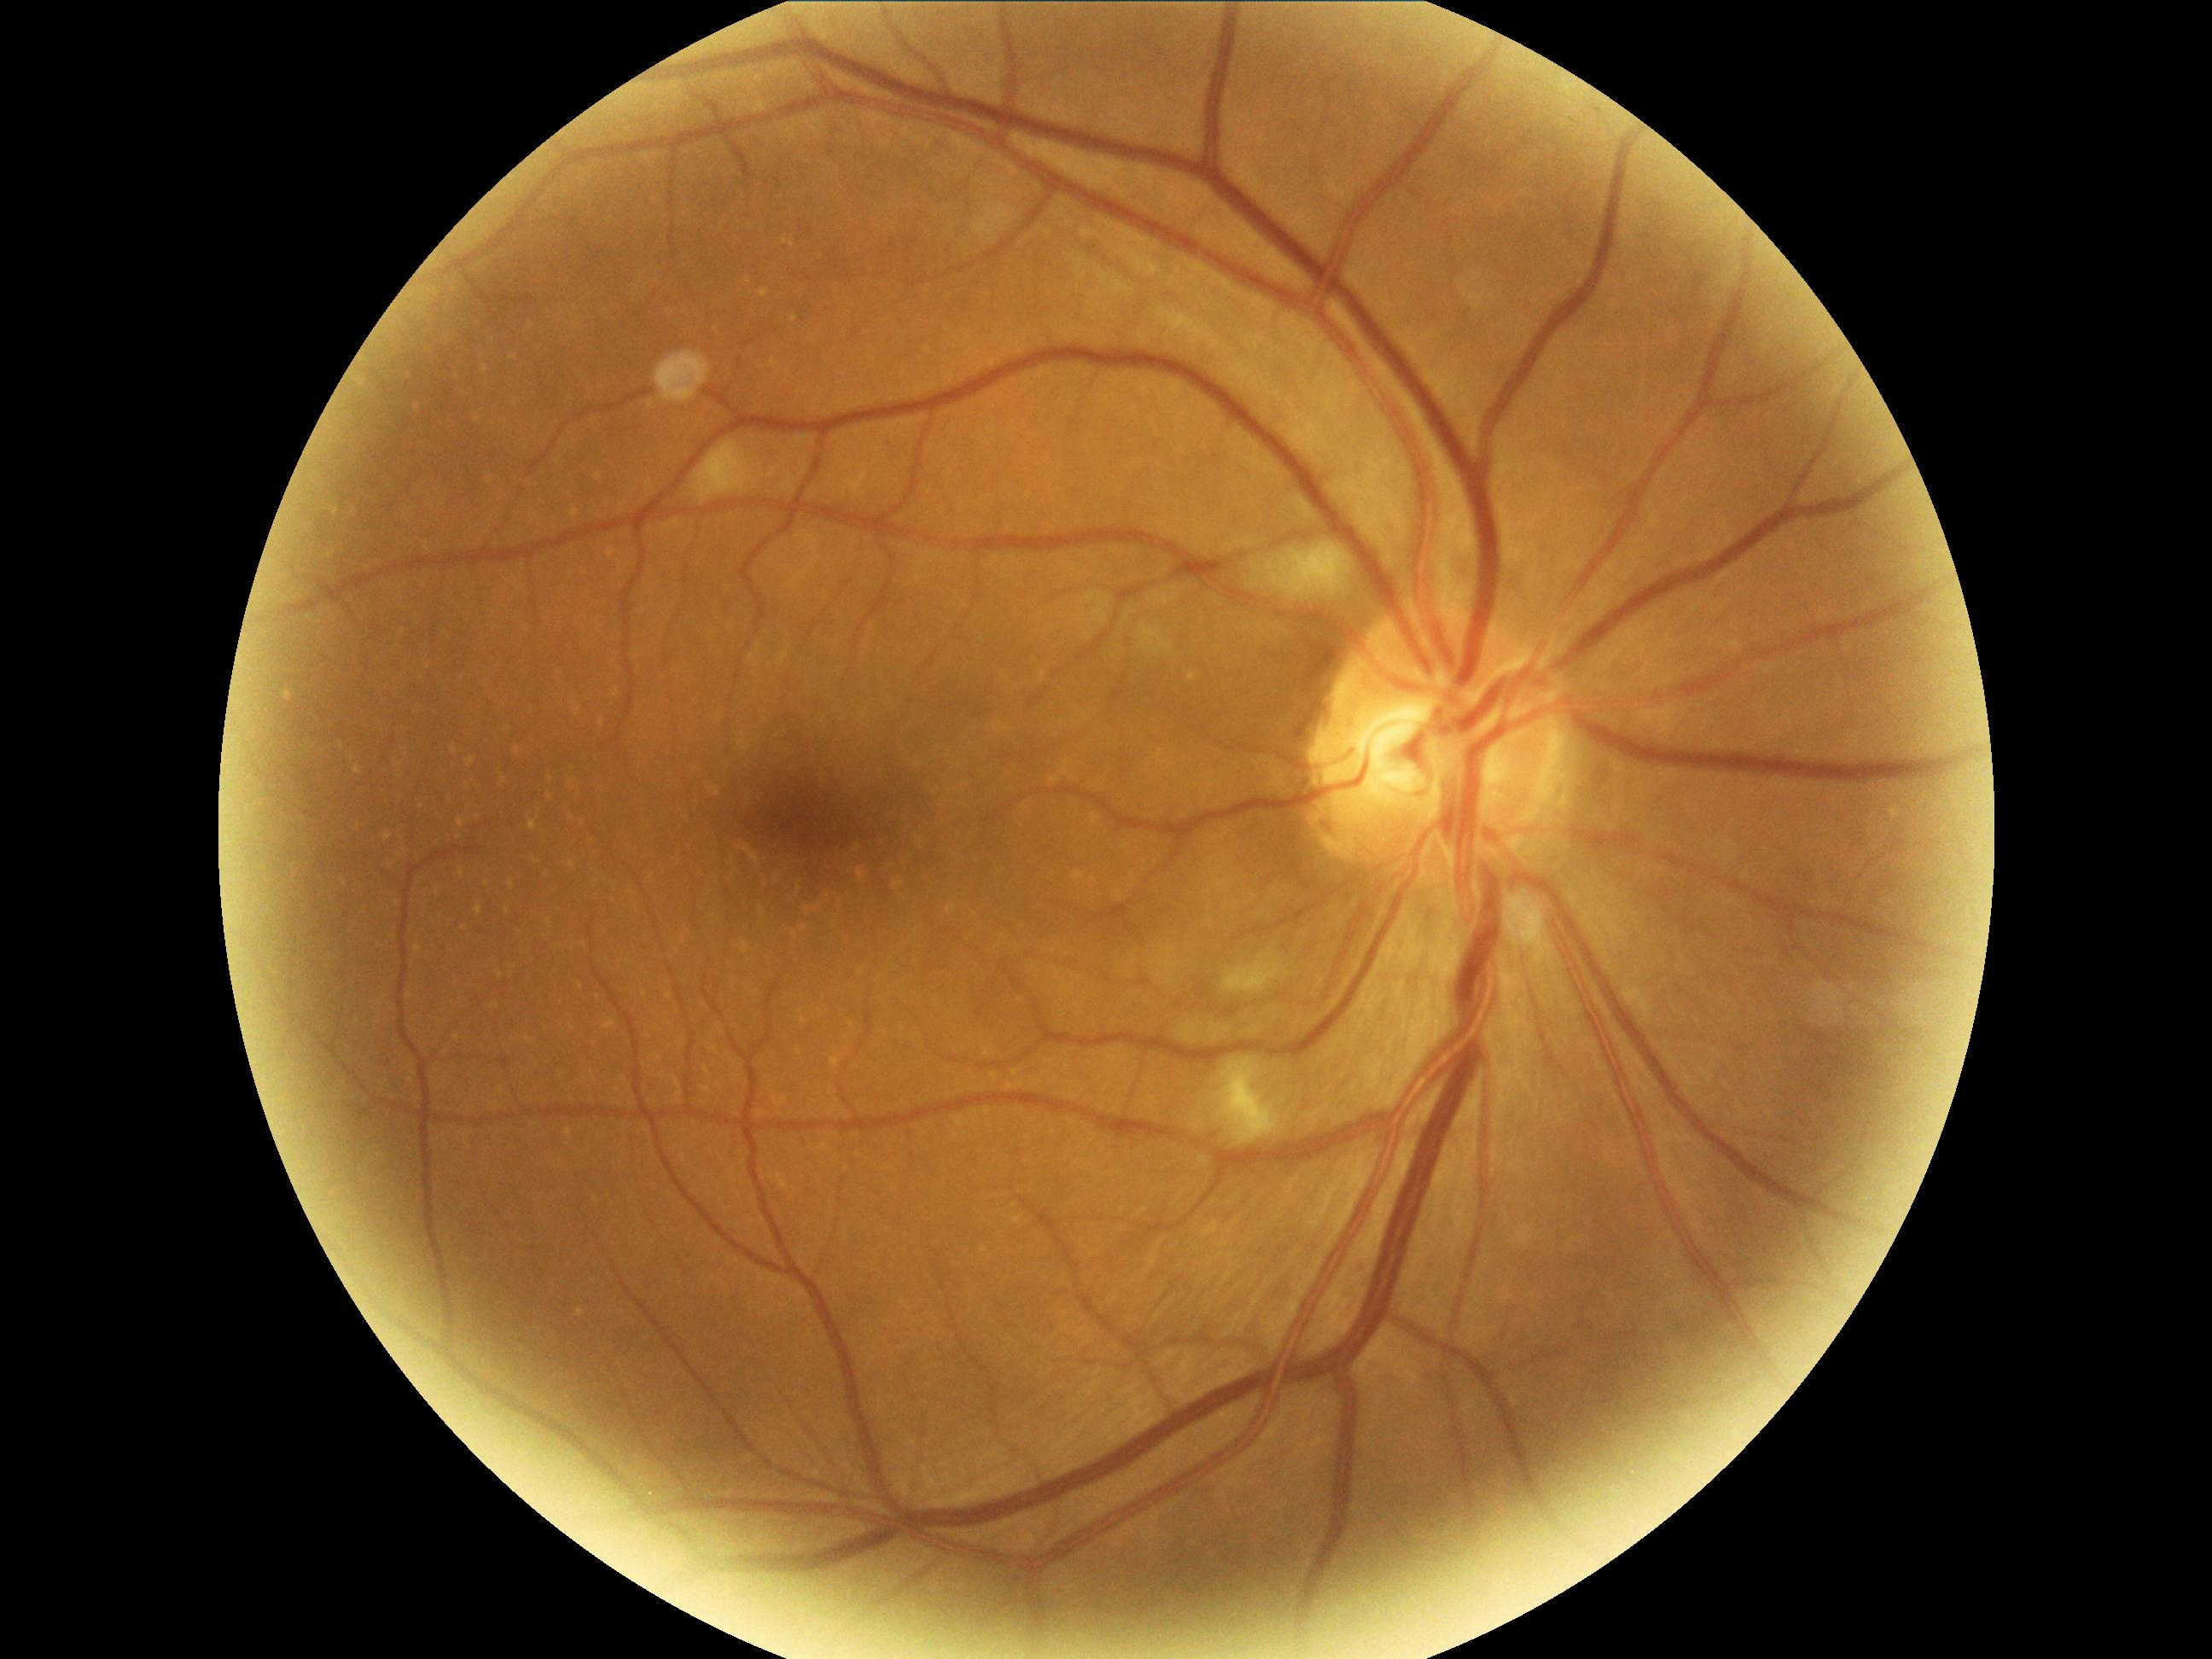


In [ ]:
img = crop_image_(image)
cv2.imwrite("2.jpg", img)
img.shape

(1944, 2098, 3)

Cropped image: </br>
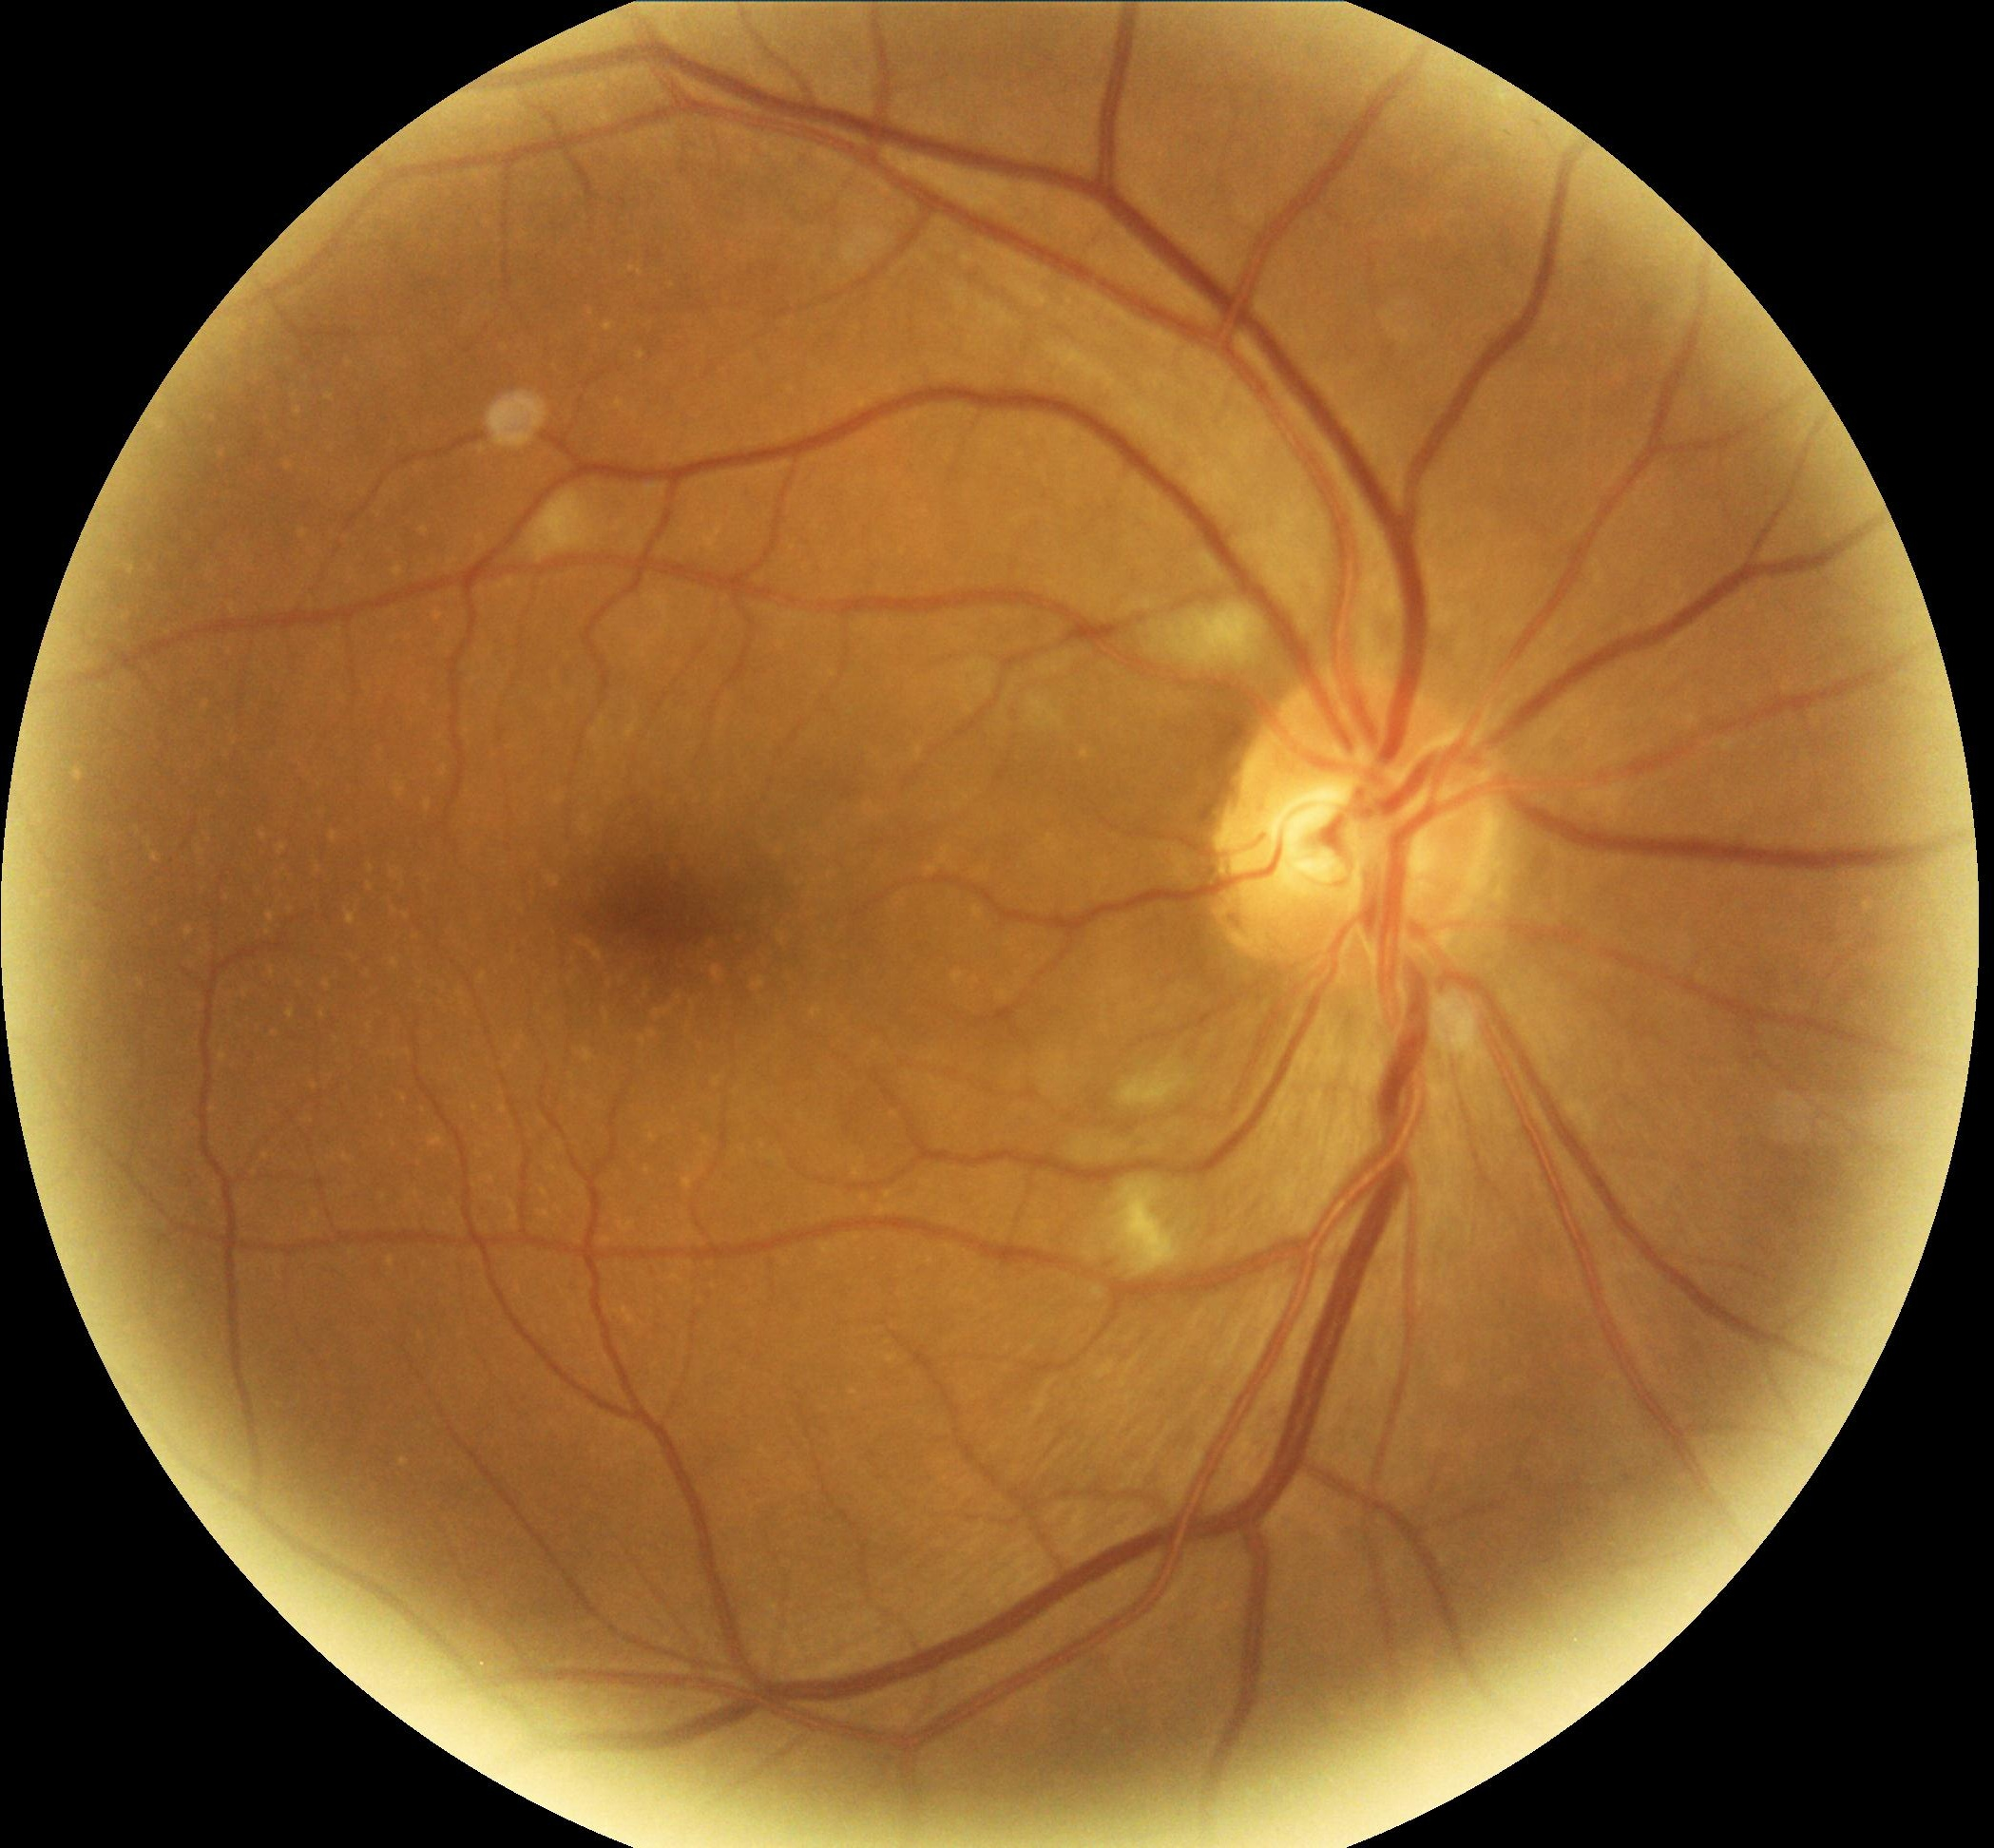

### 2. Apply Ben Graham Method

In [ ]:
img2 = ben_graham_(img, scale=350)
cv2.imwrite("3.jpg", img2)
img2.shape

(654, 706, 3)

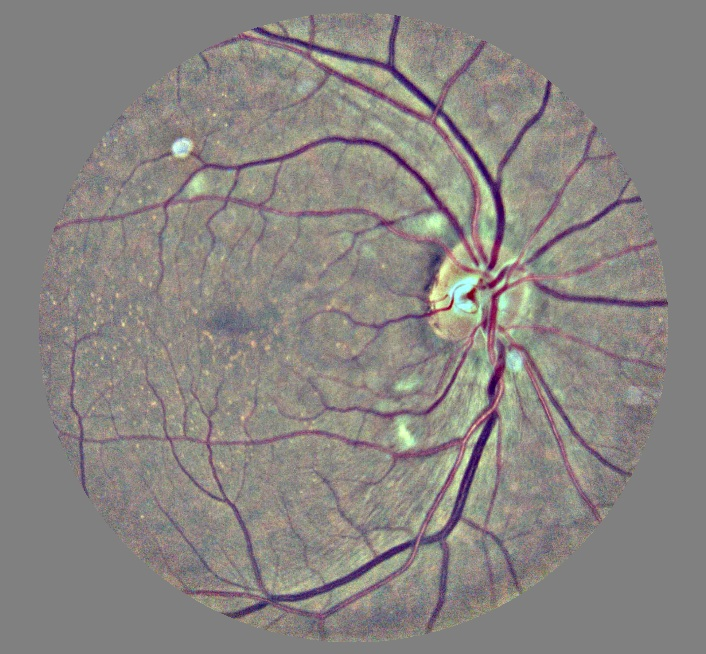

### 3. Apply resize function

In [ ]:
img3 = resize_image_(img2, image_width=224, r_or_l="right", keep_aspect_ration=False)
cv2.imwrite("4.jpg", img3)
img3.shape

(224, 224, 3)

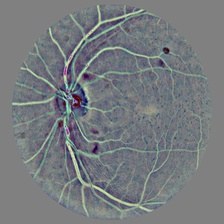

# [4] KNN

## [4]-1 Loading Training and Test images

In [3]:
def load_data(data_path):
    X_train = np.load(os.path.join(data_path, "training_images.npy"))
    y_train = np.load(os.path.join(data_path, "training_labels.npy"))

    X_val = np.load(os.path.join(data_path, "validation_images.npy"))
    y_val = np.load(os.path.join(data_path, "validation_labels.npy"))

    X_test = np.load(os.path.join(data_path, "test_images.npy"))
    y_test = np.load(os.path.join(data_path, "test_labels.npy"))

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_data('/content/drive/MyDrive/Internship/Internship2/data_odir')

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5896, 224, 224, 3), (5896, 8), (1000, 224, 224, 3), (1000, 8))

In [ ]:
X_train = X_train.reshape((5896, -1))
X_test = X_test.reshape((1000, -1))
X_train.shape, X_test.shape

((5896, 150528), (1000, 150528))

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.007


In [ ]:
y_test.shape, y_pred.shape

((1000, 8), (1000, 8))